## Retrain on the optimal pairs

### Prepare the data and metadata
Given images and captions

In [ ]:
!pip install natsort

In [18]:
import json
from glob import glob 
from natsort import natsorted

imgs_paths = natsorted(glob("../optimal_pairs/*.png"))

def txt_to_json(input_file, output_file):

    with open(input_file, 'r') as file:
        with open(output_file, 'w') as json_file:
            for im, line in zip(imgs_paths, file):
                image_class, description = line.strip().split(';  ', 1)
                image_name = im.split('/')[-1]

                data = {"file_name": image_name, "text": description}
                
                json.dump(data, json_file)
                json_file.write('\n')  # Add a newline between entries

txt_to_json('../generated_prompts.txt', '../optimal_pairs/metadata.jsonl')

## Retrain 
Using bash script [retrain_custom_ds](./retrain_custom_ds.sh), detailed explanation in [readme_txt2im](../txt2im/readme_txt2im.md)  

In [19]:
!bash retrain_custom_ds.sh

02/29/2024 11:01:22 - INFO - __main__ - Distributed environment: MULTI_GPU  Backend: nccl
Num processes: 2
Process index: 0
Local process index: 0
Device: cuda:0

Mixed precision type: fp16

02/29/2024 11:01:22 - INFO - __main__ - Distributed environment: MULTI_GPU  Backend: nccl
Num processes: 2
Process index: 1
Local process index: 1
Device: cuda:1

Mixed precision type: fp16

{'dynamic_thresholding_ratio', 'sample_max_value', 'thresholding', 'variance_type', 'clip_sample_range', 'rescale_betas_zero_snr', 'timestep_spacing'} was not found in config. Values will be initialized to default values.
{'latents_mean', 'scaling_factor', 'latents_std', 'force_upcast'} was not found in config. Values will be initialized to default values.
{'transformer_layers_per_block', 'class_embed_type', 'time_embedding_type', 'attention_type', 'addition_time_embed_dim', 'resnet_time_scale_shift', 'time_cond_proj_dim', 'reverse_transformer_layers_per_block', 'mid_block_type', 'dropout', 'timestep_post_act',

### Inference test

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

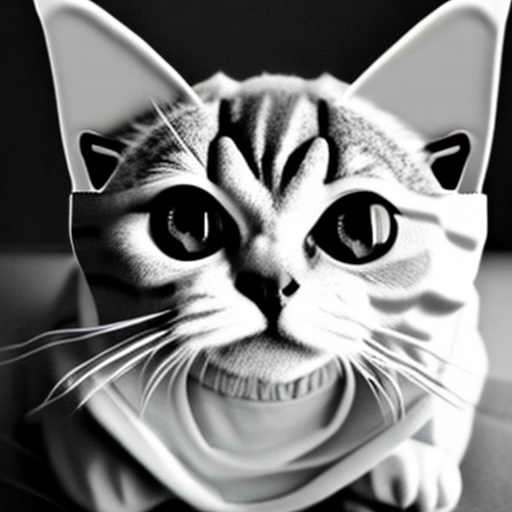

In [20]:
from diffusers import StableDiffusionPipeline
import torch

model_path = "./sd_optim_pairs_test"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

image = pipe(prompt="yoda cat").images[0]
# image.save("yoda-retrain.png")

image